
# <span style="background-color: #EB824F; padding: 10px"><strong>        Credit Score Classification     </strong></span>

# <span style="background-color: #FFFFFF; padding: 10px"><strong>**PROBLEM STATEMENT**</strong></span>
 
Banks and credit card companies calculate your credit score to determine your creditworthiness. It helps banks and credit card companies immediately to issue loans to customers with good creditworthiness. 

# <span style="background-color: #FFFFFF; padding: 10px"><strong>**PROJECT OBJECTIVE**</strong></span>
1. Conduct Exploratory Data Analysis (EDA) to gain insights into patterns and relationships within the Credit Score Dataset, identifying key factors influencing Score.
2. Develop predictive models for binary classification to identify potential Credit score of customer.

# import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# <span style="background-color: #FFFFFF; padding: 10px"><strong>**LOADING DATASET**</strong></span>

In [2]:
#TO LOAD DATASET train 
df = pd.read_csv("train.csv")
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


# 1. Information about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

 ## **Observations:**
    
1. Dataset contains 100000 rows and 28 columns.
2. There are 18 columns are float, 3 columns are of int and 7 columns are of object datatype.

#  2. check null values

In [4]:
 df.isnull().sum().to_frame().rename(columns={0:"No.of null values"})

,No.of null values
ID,0
Customer_ID,0
Month,0
Name,0
Age,0
SSN,0
Occupation,0
Annual_Income,0
Monthly_Inhand_Salary,0
Num_Bank_Accounts,0


# **Observation:**

There are no null value present in our dataset

# 3.  show the null values by heatmap 

<function matplotlib.pyplot.show(close=None, block=None)>

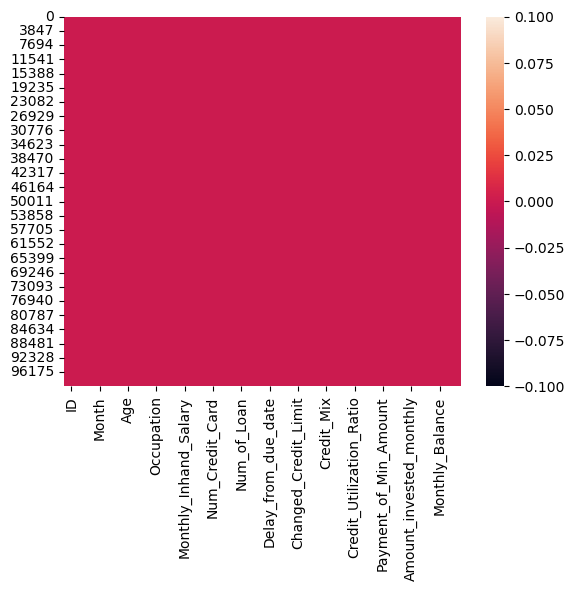

In [5]:
sns.heatmap(df.isnull())
plt.show

# 4.  Check Duplicate columns

In [6]:
df[df.duplicated()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


# **Observation:**

There is no duplicate records present in our dataset

# 5. Check datatype of all columns

In [7]:
df.dtypes.to_frame().rename(columns={0:"Datatypes of columns"})

,Datatypes of columns
ID,int64
Customer_ID,int64
Month,int64
Name,object
Age,float64
SSN,float64
Occupation,object
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64


#  **Observations:**
    
1. There are 18 columns are float, 3 columns are of int and 7 columns are of object datatype.

# 6. Basic statistical information about Numerical columns

In [8]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


#  7. Drop  record unwanted columns permanently

In [9]:
df.drop(df.columns[[0, 1, 2, 3, 4, 5, 6, 13, 16, 17, 20, 22, 23, 24, 25]], axis=1, inplace=True)

In [10]:
#check after drop the unwanted columns
df

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Monthly_Balance,Credit_Score
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,Good,809.98,265.0,312.494089,Good
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,Good,809.98,266.0,284.629162,Good
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,Good,809.98,267.0,331.209863,Good
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,Good,809.98,268.0,223.451310,Good
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,Good,809.98,269.0,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,Good,502.38,378.0,479.866228,Poor
99996,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,Good,502.38,379.0,496.651610,Poor
99997,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,Good,502.38,380.0,516.809083,Poor
99998,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,Good,502.38,381.0,319.164979,Standard


# 8. Printing Unique values:

In [11]:
for i in df.columns:
    print("*"*20 , i, "*"*20)
    print(df[i].unique())

******************** Annual_Income ********************
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
******************** Monthly_Inhand_Salary ********************
[ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]
******************** Num_Bank_Accounts ********************
[ 3.  2.  1.  7.  4.  0.  8.  5.  6.  9. 10. 11.]
******************** Num_Credit_Card ********************
[ 4.  5.  1.  7.  6.  8.  3.  9.  2. 10. 11.  0.]
******************** Interest_Rate ********************
[ 3.  6.  8.  4.  5. 15.  7. 12. 20.  1. 14. 32. 16. 17. 10. 31. 25. 18.
 19.  9. 24. 13. 33. 11. 21. 29. 28. 30. 23. 34.  2. 27. 26. 22.]
******************** Num_of_Loan ********************
[4. 1. 3. 0. 2. 7. 5. 6. 8. 9.]
******************** Delay_from_due_date ********************
[ 3.  5.  6.  8.  7. 13. 10.  0.  4.  9.  1. 12. 11. 30. 31. 34. 27. 14.
  2. 16. 17. 15. 23. 22. 21. 18. 19. 52. 51. 48. 53. 26. 43. 28. 25. 20.
 47. 46. 4

# 9. Check output column values

In [12]:
df["Credit_Score"].value_counts().to_frame().rename(columns={0:'Credit score'})

,Credit_Score
Standard,53174
Poor,28998
Good,17828


# 10. Visulalisation to how many samples in credit_score categories Good, Standard, poor

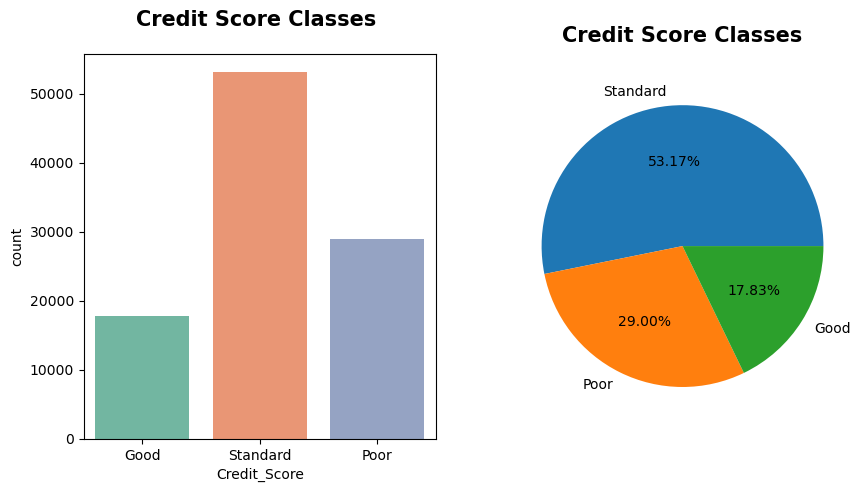

In [13]:
plt.figure(figsize= (10,5))

plt.subplot(1,2, 1)
sns.countplot(df["Credit_Score"],  palette='Set2')

plt.title("Credit Score Classes ",
          fontsize=15,
          color="Black", fontweight="bold", loc= "center",
     pad="20")

plt.subplot(1,2, 2)

plt.pie(df['Credit_Score'].value_counts().values,labels=["Standard", "Poor", "Good"], autopct= "%.2f%%")

plt.title("Credit Score Classes",
          fontsize=15,
          color="Black", fontweight="bold", loc= "center",
          pad="20")
plt.show()

# Plotting check Annual Income of the person impacts your credit scores or not

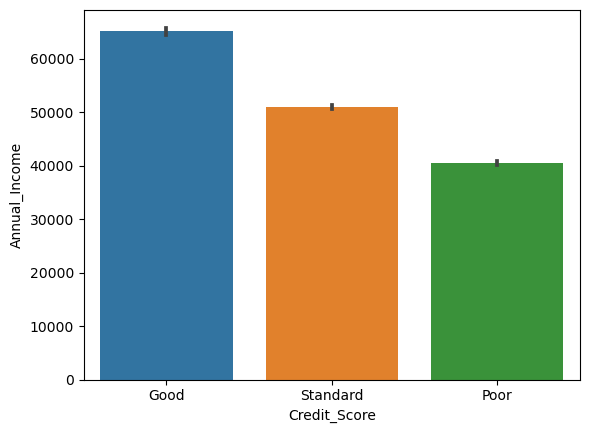

In [14]:
sns.barplot(x = 'Credit_Score',y= 'Annual_Income' ,data = df)
plt.show()

# **Observation:**
Having high annual income may impacts on credit score that means high annual income means good cerdit score and low annual income indicates poor credit score

# Check more bank accounts impacts credit scores or not

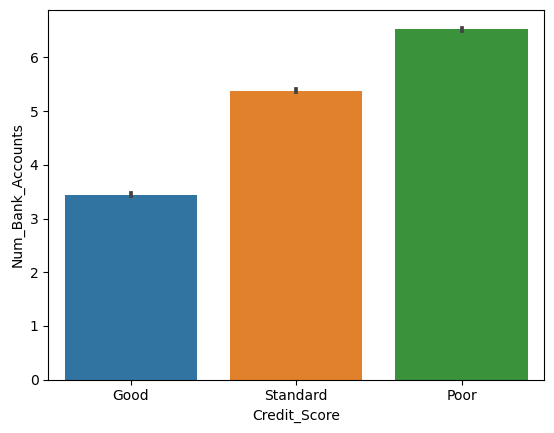

In [15]:
sns.barplot(x = 'Credit_Score',y= 'Num_Bank_Accounts' ,data = df)
plt.show()

# **Observation:**
Above char shows the increasing  no. of bank accounts affects the cerdit score which is poor 

# Check credit scores based on the number of credit cards of customer

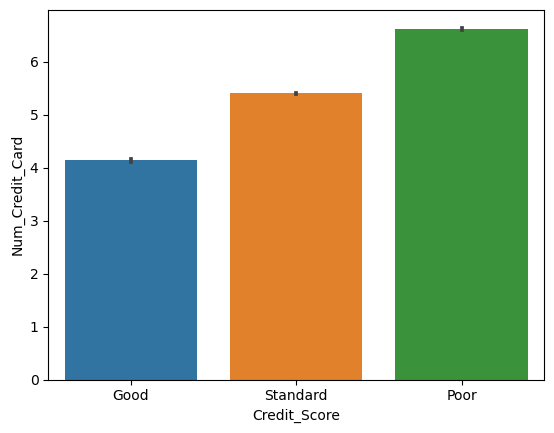

In [16]:
sns.barplot(x = 'Credit_Score',y= 'Num_Credit_Card' ,data = df)
plt.show()

# **Observation:**
Above char shows the increasing  no. of credit cards affects the cerdit score which is poor 

# Check delaying payments on the due date impacts your credit scores or not:

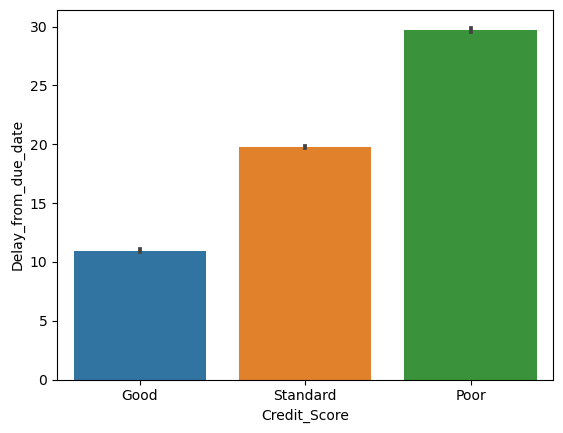

In [17]:
sns.barplot(x = 'Credit_Score',y= 'Delay_from_due_date' ,data = df)
plt.show()

# **Observation:**
Delaying payemnts from due date may more impact on cerdit score 

# Check how the credit history age of a person affects credit scores

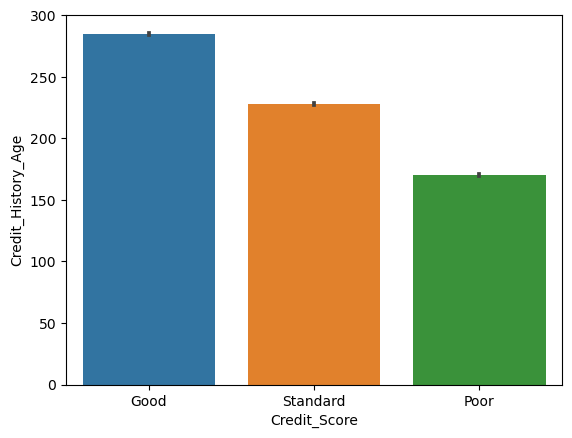

In [18]:
sns.barplot(x = 'Credit_Score',y= 'Credit_History_Age' ,data = df)
plt.show()

# check datatype of all columns

In [19]:
df.dtypes

Annual_Income             float64
Monthly_Inhand_Salary     float64
Num_Bank_Accounts         float64
Num_Credit_Card           float64
Interest_Rate             float64
Num_of_Loan               float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Credit_Mix                 object
Outstanding_Debt          float64
Credit_History_Age        float64
Monthly_Balance           float64
Credit_Score               object
dtype: object

# Observations:
There are 11 columns are float, 2 columns are of object 

# Converts object type colunm Credit_Score and credit_mix into numeric type

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Credit_Mix']=le.fit_transform(df['Credit_Mix'])
df['Credit_Score']=le.fit_transform(df['Credit_Score'])

# Observations:
change the object columns values into integer value

# Check values after chenge into interger

In [21]:
#check datatype of all columns
df.dtypes.to_frame().rename(columns={0:"Datatype of column"})

,Datatype of column
Annual_Income,float64
Monthly_Inhand_Salary,float64
Num_Bank_Accounts,float64
Num_Credit_Card,float64
Interest_Rate,float64
Num_of_Loan,float64
Delay_from_due_date,float64
Num_of_Delayed_Payment,float64
Credit_Mix,int32
Outstanding_Debt,float64


# <span style="background-color: #EB824F; padding: 10px"><strong>**Separating Indepenent (x) and Dependent Variable (y)**</strong></span>

In [22]:
X = df.drop("Credit_Score",axis=1)  #input select
Y = df['Credit_Score']  #output

# check input data

In [23]:
X

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_History_Age,Monthly_Balance
0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,1,809.98,265.0,312.494089
1,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,1,809.98,266.0,284.629162
2,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,1,809.98,267.0,331.209863
3,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,1,809.98,268.0,223.451310
4,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,1,809.98,269.0,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,1,502.38,378.0,479.866228
99996,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,1,502.38,379.0,496.651610
99997,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,1,502.38,380.0,516.809083
99998,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,1,502.38,381.0,319.164979


# check output data

In [24]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    2
99999    1
Name: Credit_Score, Length: 100000, dtype: int32

# <span style="background-color: #EB824F; padding: 10px"><strong>**Splitting Data for Model Training and testing:**</strong></span>

In [25]:
# call train test split class
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

# Apply standard Scaler on X_Train and X_test inputs

In [26]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
#apply StandardScaler on input data
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

# Import metrics class

In [27]:
#import metrics class
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Create function for various model building

In [28]:
def create_model(model):
    model.fit(X_train,Y_train)  #train the model with 70% data
    Y_pred=model.predict(X_test)  #train the model with 30 % data
    #generate report
    #inbuilt class_classification_report
    from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
    Testing_Score=accuracy_score(Y_test, Y_pred)
    print('Testing Score of model',Testing_Score.round(2))
    print(classification_report(Y_test,Y_pred))
    #confusion matrix
    print(confusion_matrix(Y_test,Y_pred))
    return model

# <span style="background-color: #EB824F; padding: 10px"><strong>**MODEL BUILDING:**</strong></span>

# 1. Logistic Regression Model

In [29]:
#perform the model with logistic regression
#problem statement : either customer will claim the insurance or not after hospitalize
from sklearn.linear_model import LogisticRegression

#create object of Logistic Regression class
lr=LogisticRegression()
#call function for training and testing the model with logistic regression
lr=create_model(lr)

Testing Score of model 0.63
              precision    recall  f1-score   support

           0       0.57      0.55      0.56      5327
           1       0.62      0.50      0.55      8683
           2       0.66      0.73      0.69     15990

    accuracy                           0.63     30000
   macro avg       0.61      0.59      0.60     30000
weighted avg       0.63      0.63      0.63     30000

[[ 2949   105  2273]
 [  509  4346  3828]
 [ 1742  2606 11642]]


# 2. Random Forest Model

In [30]:
#perform the model with RandomForestClassifier algorithm
#problem statement : banks and credit card companies immediately to issue loans to customers with good creditworthiness.
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
#call function for training and testing the model with RandomForestClassifier algorithm
rfc=create_model(rfc)

Testing Score of model 0.81
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      5327
           1       0.80      0.83      0.81      8683
           2       0.83      0.81      0.82     15990

    accuracy                           0.81     30000
   macro avg       0.80      0.80      0.80     30000
weighted avg       0.81      0.81      0.81     30000

[[ 4111    28  1188]
 [   29  7166  1488]
 [ 1188  1816 12986]]


# 3. DecisionTree Model

In [31]:
#to call DecisionTreeClassifier inbuilt class
from sklearn.tree import DecisionTreeClassifier
#object of DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1,max_depth=5,min_samples_leaf=45,criterion='entropy')  #by default use Gini index
#call function for training and test with DecisionTreeClassifier
dtc=create_model(dtc)

Testing Score of model 0.7
              precision    recall  f1-score   support

           0       0.57      0.67      0.62      5327
           1       0.68      0.67      0.68      8683
           2       0.76      0.72      0.74     15990

    accuracy                           0.70     30000
   macro avg       0.67      0.69      0.68     30000
weighted avg       0.70      0.70      0.70     30000

[[ 3580   276  1471]
 [  614  5822  2247]
 [ 2044  2446 11500]]


# 4. Ada- Boost-Classifier Model

In [32]:
#ADABoostclassifier inbuilt class
from sklearn.ensemble import AdaBoostClassifier

#create object of AdaBoostClassifier class
ada=AdaBoostClassifier(random_state=1,n_estimators=3)

#n_estimators means how many decision stump , decision stump depend on 
#no. of input
ada=create_model(ada)

Testing Score of model 0.6
              precision    recall  f1-score   support

           0       0.78      0.20      0.32      5327
           1       0.58      0.44      0.50      8683
           2       0.59      0.82      0.69     15990

    accuracy                           0.60     30000
   macro avg       0.65      0.49      0.50     30000
weighted avg       0.62      0.60      0.57     30000

[[ 1055   120  4152]
 [    1  3861  4821]
 [  288  2631 13071]]


# 5. Gradient-Boosting-Classifier Model

In [33]:
#inbuilt class Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

#create the object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(random_state=1,n_estimators=72)

#n_estimetors>=10 and <=100
gbc=create_model(gbc)

Testing Score of model 0.7
              precision    recall  f1-score   support

           0       0.58      0.71      0.64      5327
           1       0.70      0.67      0.68      8683
           2       0.76      0.72      0.74     15990

    accuracy                           0.70     30000
   macro avg       0.68      0.70      0.69     30000
weighted avg       0.71      0.70      0.70     30000

[[ 3773   115  1439]
 [  695  5797  2191]
 [ 2080  2418 11492]]


# 6. XGBClassifier Model

In [34]:
#call inbuilt class XGBclassifier
from xgboost import XGBClassifier

#create object of XGBclassifier
xgb=XGBClassifier(n_estimators=21)
xgb=create_model(xgb)

Testing Score of model 0.72
              precision    recall  f1-score   support

           0       0.59      0.70      0.64      5327
           1       0.71      0.71      0.71      8683
           2       0.78      0.73      0.75     15990

    accuracy                           0.72     30000
   macro avg       0.69      0.71      0.70     30000
weighted avg       0.73      0.72      0.72     30000

[[ 3729   180  1418]
 [  608  6179  1896]
 [ 1952  2346 11692]]


# 7. K-Nearest Neighbors model

In [35]:
#call KNeighborsClassifier class
from sklearn.neighbors import KNeighborsClassifier

#create object of KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski",p=2)
knn=create_model(knn)

Testing Score of model 0.78
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      5327
           1       0.77      0.80      0.78      8683
           2       0.81      0.78      0.80     15990

    accuracy                           0.78     30000
   macro avg       0.76      0.77      0.76     30000
weighted avg       0.78      0.78      0.78     30000

[[ 3872    90  1365]
 [  233  6949  1501]
 [ 1476  2027 12487]]


# On the Basis of above performance of all the algorithms, We are going to select 3 top performing algorithms while testing.

Top performing algorithms are :

1.  Random forest classifier with test accuracy - 0.81 

2. K-Nearest Neighbors model with test accuracy - 0.78 

3. XGBClassifier Model with test accuracy- 0.72


# Will select  Random forest Classifier as our final model as its accuracy is good  


In [43]:
rfc.fit(X_train,Y_train)  #train the model with 70% data
Y_pred=rfc.predict(X_test)
cm = confusion_matrix(Y_test,Y_pred)

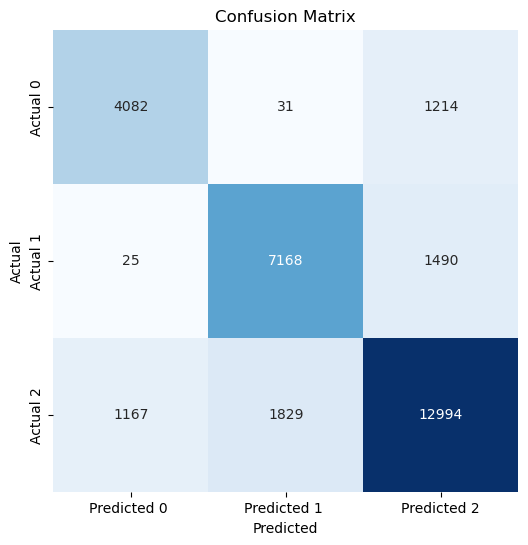

In [42]:
# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted 0 ', 'Predicted 1 ','Predicted 2'],
            yticklabels=['Actual 0', 'Actual 1','Actual 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# <span style="background-color: #FFE4B5; padding: 10px"><strong>**Recommendations:**</strong></span>
1. Classifying customers based on their credit scores helps banks and credit card companies
 immediately to issue loans to customers with good creditworthiness.

2. A person with a good credit score will get loans from any bank and financial institution.
 

# Deployment of model

In [44]:
#Deployment of model
import pickle   

Credit_score1 = open("model2.pkl",'wb')


#save object of StandardScaler class in file 
Credit_score2 = open('scale2.pkl','wb')

#to save the object 
pickle.dump(rfc,Credit_score1)  


#to close the temporary file file1

Credit_score1.close()

#to store object of standard scaler in file2
pickle.dump(ss,Credit_score2)

#to close temporary file file2
Credit_score2.close()

In [ ]:
'''print("Credit Score Prediction : ")
Annual_Income = float(input("Annual Income: "))
Monthly_Inhand_Salary = float(input("Monthly Inhand Salary: "))
Number_of_Bank_Accounts = float(input("Number of Bank Accounts: "))
Number_of_Credit_cards = float(input("Number of Credit cards: "))
Interest_rate = float(input("Interest rate: "))
Number_of_Loans = float(input("Number of Loans: "))
no_of_day_delayed = float(input("Average number of days delayed by the person: "))
no_of_delayed_payment = float(input("Number of delayed payments: "))
Changed_Credit_Limit =float(input("Changed Credit Limit: "))
Credit_Mix = input("Credit Mix (Good: 1, Standard: 2, bad: 0) : ")
Outstanding_Debt = float(input("Outstanding Debt: "))
Credit_Utilization_Ratio = float(input("Credit Utilization Ratio: "))
Credit_History_Age = float(input("Credit History Age: "))
Total_EMI_per_month = float(input("Total EMI per month: "))
Amount_invested_monthly = float(input("Amount invested monthly: "))
Monthly_Balance = float(input("Monthly Balance: "))

data=[Annual_Income,Monthly_Inhand_Salary,Number_of_Bank_Accounts,Number_of_Credit_cards,Interest_rate,Number_of_Loans,no_of_day_delayed,
     no_of_delayed_payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,
     Amount_invested_monthly,Monthly_Balance]


#To change list in numpy array (2D)
import numpy as np
X=np.array([data])

data=ss.fit_transform(X)
#print("Predicted Credit Score = ", model.predict(data))
prediction=model.predict(data)

                                
if prediction[0] == 1:
    print("Predicted Credit Score = poor")
elif prediction[0] == 2:
    print("Predicted Credit Score = Standard ")
elif prediction[0] == 0:
    print("Predicted Credit Score = Good")
else:
    print("ok")
    '''